In [1]:
#based on data from https://www.kaggle.com/datasets/sohier/crime-in-baltimore

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2

In [16]:
df=pd.read_csv('../data/BPD_Part_1_Victim_Based_Crime_Data.csv')

In [4]:
set(df['Description'])

{'AGG. ASSAULT',
 'ARSON',
 'ASSAULT BY THREAT',
 'AUTO THEFT',
 'BURGLARY',
 'COMMON ASSAULT',
 'HOMICIDE',
 'LARCENY',
 'LARCENY FROM AUTO',
 'RAPE',
 'ROBBERY - CARJACKING',
 'ROBBERY - COMMERCIAL',
 'ROBBERY - RESIDENCE',
 'ROBBERY - STREET',
 'SHOOTING'}

In [5]:
'''
Chatgpt:
For your analysis focusing on homicides and confidence intervals, you can explore several questions. Here are a few ideas, along with a brief explanation of how confidence intervals can be used to address each question:

    What is the average number of homicides per year in Baltimore from 2012-2017?
        You could calculate the average number of homicides each year and then construct a confidence interval around that mean. This would allow you to estimate the true average homicide rate with a certain level of confidence (e.g., 95%).

    Is there a statistically significant difference in homicide rates between different years?
        You could compute confidence intervals for the homicide rates for each year and compare them. Overlapping confidence intervals suggest that the difference may not be statistically significant, while non-overlapping intervals could indicate a significant difference.

    What is the proportion of homicides relative to other crimes?
        You could calculate the proportion of homicides among all crimes in each year or across the whole period and then construct a confidence interval for this proportion. This would help you understand the variability of the homicide rate relative to the total crime rate.

    Is there a difference in the proportion of homicides across different months?
        You could group the data by months and construct confidence intervals for the monthly homicide rates. This would allow you to assess whether some months consistently show higher or lower homicide rates, giving insight into possible seasonal trends.

    Estimate the future homicide rate based on past data (2012-2017).
        Using the past homicide data, you could estimate the expected homicide rate for future periods and construct a confidence interval around that estimate. This would provide a range for the future homicide rate based on historical data.
'''

'\nChatgpt:\nFor your analysis focusing on homicides and confidence intervals, you can explore several questions. Here are a few ideas, along with a brief explanation of how confidence intervals can be used to address each question:\n\n    What is the average number of homicides per year in Baltimore from 2012-2017?\n        You could calculate the average number of homicides each year and then construct a confidence interval around that mean. This would allow you to estimate the true average homicide rate with a certain level of confidence (e.g., 95%).\n\n    Is there a statistically significant difference in homicide rates between different years?\n        You could compute confidence intervals for the homicide rates for each year and compare them. Overlapping confidence intervals suggest that the difference may not be statistically significant, while non-overlapping intervals could indicate a significant difference.\n\n    What is the proportion of homicides relative to other crimes

/tmp/ipykernel_912955/2526144904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides_df['CrimeDate'] = pd.to_datetime(homicides_df['CrimeDate'])
/tmp/ipykernel_912955/2526144904.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicides_df['Year'] = homicides_df['CrimeDate'].dt.year


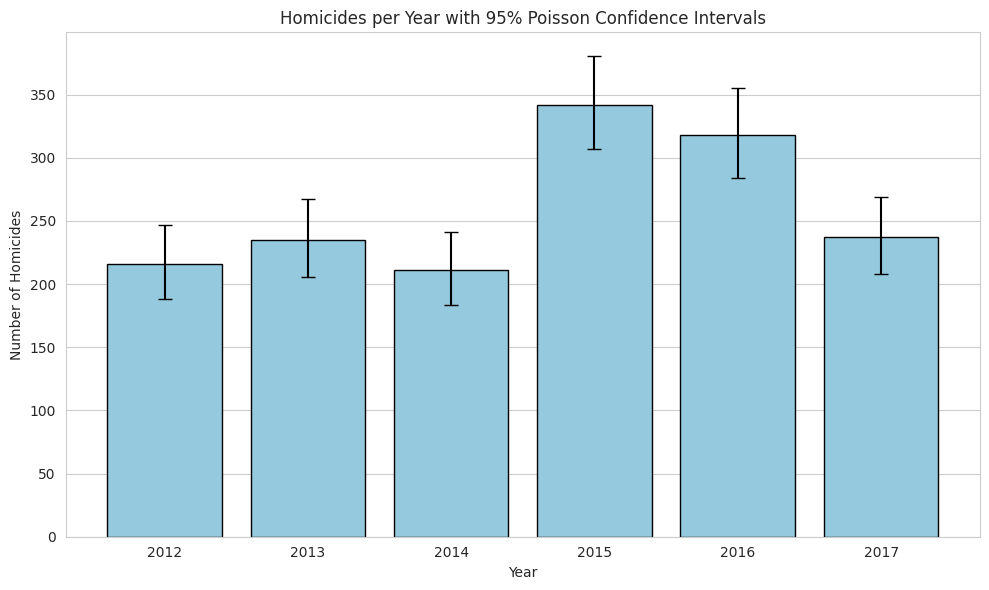

In [25]:
# Filter the data to only include homicides
# Load the dataset
df = pd.read_csv('../data/BPD_Part_1_Victim_Based_Crime_Data.csv')

# Filter the data to only include homicides
homicides_df = df[df['Description'] == 'HOMICIDE']

# Convert the CrimeDate column to datetime
homicides_df['CrimeDate'] = pd.to_datetime(homicides_df['CrimeDate'])

# Extract the year from the CrimeDate column
homicides_df['Year'] = homicides_df['CrimeDate'].dt.year

# Filter data for the years 2012-2017
homicides_df = homicides_df[(homicides_df['Year'] >= 2012) & (homicides_df['Year'] <= 2017)]

# Count the number of homicides for each year
homicides_per_year = homicides_df['Year'].value_counts().sort_index()

# Prepare data for calculations
years = homicides_per_year.index.astype(int)
counts = homicides_per_year.values

# Significance level
alpha = 0.05

# Calculate exact Poisson confidence intervals
lower_bounds = []
upper_bounds = []

for x in counts:
    # Lower bound
    if x == 0:
        lower = 0
    else:
        lower = 0.5 * chi2.ppf(alpha / 2, 2 * x)
    # Upper bound
    upper = 0.5 * chi2.ppf(1 - alpha / 2, 2 * (x + 1))
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Create a DataFrame with the results
ci_df = pd.DataFrame({
    'Year': years,
    'Homicides': counts,
    'Lower_CI': lower_bounds,
    'Upper_CI': upper_bounds
})

# Set the style for seaborn
sns.set_style('whitegrid')

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the bar chart
sns.barplot(x='Year', y='Homicides', data=ci_df, color='skyblue', edgecolor='black')

# Add error bars
plt.errorbar(
    x=np.arange(len(ci_df)),
    y=ci_df['Homicides'],
    yerr=[ci_df['Homicides'] - ci_df['Lower_CI'], ci_df['Upper_CI'] - ci_df['Homicides']],
    fmt='none', c='black', capsize=5
)

# Customize the plot
plt.title('Homicides per Year with 95% Poisson Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Number of Homicides')
plt.xticks(ticks=np.arange(len(ci_df)), labels=ci_df['Year'])
plt.tight_layout()

# Show the plot
plt.show()


In [36]:
import pandas as pd
import numpy as np

# Assume 'df' is your original DataFrame
# Filter the data to only include homicides
homicides_df = df[df['Description'] == 'HOMICIDE'].copy()

# Convert 'CrimeDate' to datetime
homicides_df['CrimeDate'] = pd.to_datetime(homicides_df['CrimeDate'])

# Combine 'CrimeDate' and 'CrimeTime' into 'CrimeDateTime'
homicides_df['CrimeDateTime'] = pd.to_datetime(
    homicides_df['CrimeDate'].dt.strftime('%Y-%m-%d') + ' ' + homicides_df['CrimeTime'],
    errors='coerce'
)

# Remove rows with invalid 'CrimeDateTime'
homicides_df = homicides_df.dropna(subset=['CrimeDateTime']).reset_index(drop=True)

# Sort the DataFrame by 'CrimeDateTime'
homicides_df = homicides_df.sort_values('CrimeDateTime').reset_index(drop=True)

# Calculate the time differences
homicides_df['TimeDifference'] = homicides_df['CrimeDateTime'].diff()

# Remove the first row since it will have a NaT value for the time difference
homicides_df = homicides_df.dropna(subset=['TimeDifference']).reset_index(drop=True)

# Convert time differences to total seconds
homicides_df['TimeDifferenceSeconds'] = homicides_df['TimeDifference'].dt.total_seconds()

# Create a NumPy array of time intervals
time_intervals = homicides_df['TimeDifferenceSeconds'].values

time_intervals/60/60


array([19.6       , 35.38333333, 33.88333333, ...,  2.13333333,
       68.35      ,  3.11666667])

(array([324., 155., 142., 140., 160., 104.,  83.,  47.,  69.,  52.,  31.,
         27.,  26.,  31.,  28.,  17.,  13.,  16.,  15.,   9.,   4.,   6.,
          9.,   6.,   5.,   3.,   9.,   3.,   2.,   1.,   4.,   4.,   2.,
          0.,   2.,   3.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   1.]),
 array([  0.  ,   5.32,  10.64,  15.96,  21.28,  26.6 ,  31.92,  37.24,
         42.56,  47.88,  53.2 ,  58.52,  63.84,  69.16,  74.48,  79.8 ,
         85.12,  90.44,  95.76, 101.08, 106.4 , 111.72, 117.04, 122.36,
        127.68, 133.  , 138.32, 143.64, 148.96, 154.28, 159.6 , 164.92,
        170.24, 175.56, 180.88, 186.2 , 191.52, 196.84, 202.16, 207.48,
        212.8 , 218.12, 223.44, 228.76, 234.08, 239.4 , 244.72, 250.04,
        255.36, 260.68, 266.  ]),
 <BarContainer object of 50 artists>)

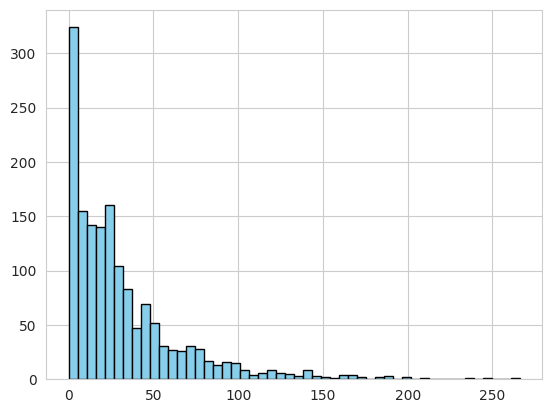

In [37]:
plt.hist(time_intervals/60/60, bins=50, color='skyblue', edgecolor='black')

In [38]:
len(df)

276529

In [48]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,01/01/2012,00:00:00,6J,1400 JOH AVE,LARCENY,I,NaN,832.0,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1
276525,01/01/2012,00:00:00,6J,5500 SINCLAIR LN,LARCENY,O,NaN,444.0,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1
276526,01/01/2012,00:00:00,6E,400 N PATTERSON PK AV,LARCENY,O,NaN,321.0,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1
276527,01/01/2012,00:00:00,5A,5800 LILLYAN AV,BURGLARY,I,NaN,425.0,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1


In [51]:
def get_intervals(crime_code, district_code):
    #print(crime_code, district_code)
    # Filter the data to include only the specified crime and district
    filtered_df = df[(df['Description'] == crime_code) & (df['District'] == district_code)].copy()

    # Convert 'CrimeDate' to datetime
    filtered_df['CrimeDate'] = pd.to_datetime(filtered_df['CrimeDate'])

    # Combine 'CrimeDate' and 'CrimeTime' into 'CrimeDateTime'
    filtered_df['CrimeDateTime'] = pd.to_datetime(
        filtered_df['CrimeDate'].dt.strftime('%Y-%m-%d') + ' ' + filtered_df['CrimeTime'],
        errors='coerce'
    )

    # Remove rows with invalid 'CrimeDateTime'
    filtered_df = filtered_df.dropna(subset=['CrimeDateTime']).reset_index(drop=True)

    # Sort the DataFrame by 'CrimeDateTime'
    filtered_df = filtered_df.sort_values('CrimeDateTime').reset_index(drop=True)

    # Calculate the time differences
    filtered_df['TimeDifference'] = filtered_df['CrimeDateTime'].diff()

    # Remove the first row since it will have a NaT value for the time difference
    filtered_df = filtered_df.dropna(subset=['TimeDifference']).reset_index(drop=True)

    # Convert time differences to total seconds
    filtered_df['TimeDifferenceSeconds'] = filtered_df['TimeDifference'].dt.total_seconds()

    # Create a NumPy array of time intervals
    time_intervals = filtered_df['TimeDifferenceSeconds'].values

    return time_intervals

#We have a 2D array of time intervals for each crime code and district code combination

In [52]:
crime_types = df['Description'].unique()
district_codes = df['District'].unique()

# Initialize an empty DataFrame to store λ estimates
lambda_df = pd.DataFrame(index=crime_types, columns=district_codes)

for crime in crime_types:
    for district in district_codes:
        time_intervals = get_intervals(crime, district)
        print(time_intervals)
        
        if len(time_intervals) > 0:
            # Calculate the mean of time intervals
            mean_interval_seconds = np.mean(time_intervals)
            
            # Estimate λ (events per second)
            lambda_estimate_per_second = 1 / mean_interval_seconds
            
            # Convert λ to events per day for better interpretability
            lambda_estimate_per_day = lambda_estimate_per_second * 86400  # 86400 seconds in a day
            
            # Store the λ estimate in the DataFrame
            lambda_df.loc[crime, district] = lambda_estimate_per_day
        else:
            # If there are no intervals, set λ as NaN
            lambda_df.loc[crime, district] = np.nan

lambda_df = lambda_df.apply(pd.to_numeric, errors='coerce')


[0.00000e+00 3.12900e+05 1.90200e+05 9.42000e+04 6.61800e+05 8.65320e+05
 7.21560e+05 1.27392e+06 1.24830e+06 2.48700e+05 3.49200e+05 4.64280e+05
 1.67556e+06 0.00000e+00 7.41600e+04 6.05100e+05 1.50000e+03 8.46900e+05
 2.63100e+05 7.04100e+05 1.29900e+05 1.54410e+06 1.00380e+05 6.96600e+04
 5.70060e+05 1.23000e+05 3.53340e+05 0.00000e+00 2.48400e+04 5.73240e+05
 2.41380e+05 2.89860e+05 1.28640e+05 0.00000e+00 3.74940e+05 1.71360e+05
 2.51466e+06 0.00000e+00 2.15940e+05 1.31040e+06 8.07900e+05 3.26100e+05
 2.53620e+05 0.00000e+00 0.00000e+00 8.88000e+03 7.81260e+05 3.54000e+03
 0.00000e+00 0.00000e+00 1.84068e+06 4.13280e+05 2.46840e+05 7.76640e+05
 8.40360e+05 9.27000e+04 6.69300e+05 1.52640e+06 0.00000e+00 1.53540e+05
 5.39760e+05 2.55900e+05 7.05000e+04 2.14800e+05 1.47900e+05 6.50100e+05
 8.36400e+04 6.27060e+05 0.00000e+00 2.48700e+05 0.00000e+00 0.00000e+00
 8.75820e+05 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.17540e+05
 1.11834e+06 3.87600e+05 0.00000e+00 4.48500e+05 0.

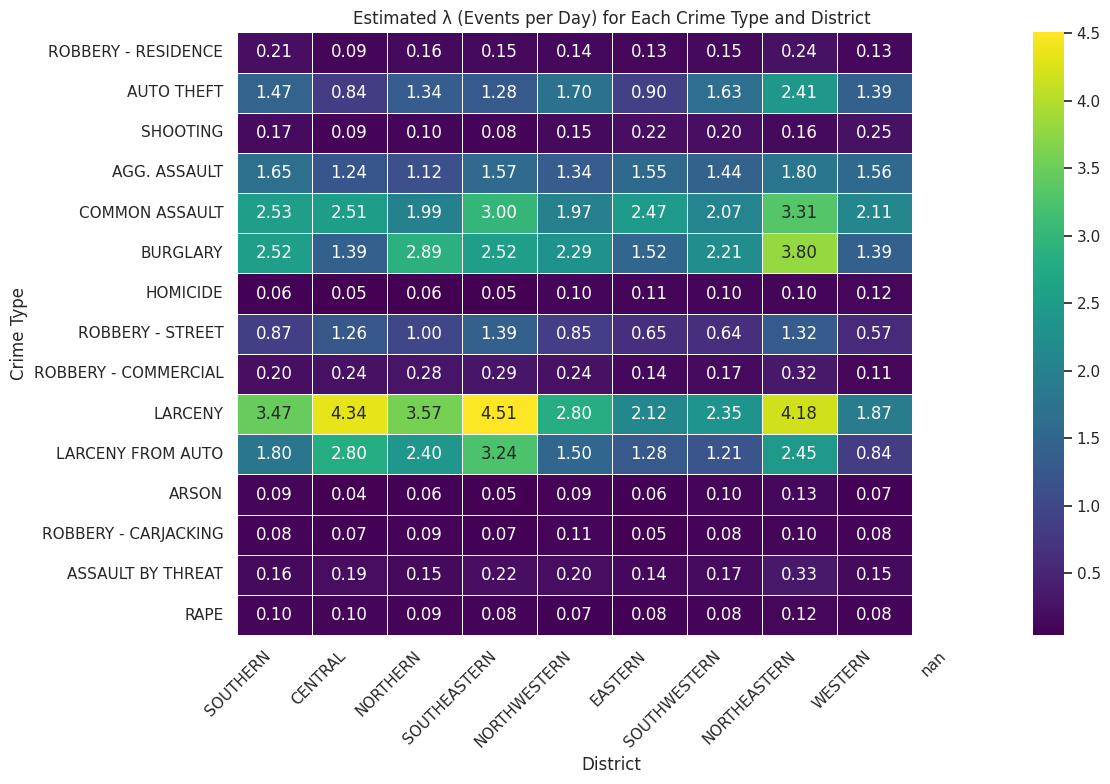

In [53]:
plt.figure(figsize=(12, 8))
sns.set(style="white")

# Create a mask for the NaN values (optional)
mask = lambda_df.isnull()

# Plot the heatmap
sns.heatmap(lambda_df, annot=True, fmt=".2f", cmap='viridis', mask=mask, linewidths=.5)

# Customize the plot
plt.title('Estimated λ (Events per Day) for Each Crime Type and District')
plt.xlabel('District')
plt.ylabel('Crime Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.tight_layout()
plt.show()

In [54]:
lambda_df

,SOUTHERN,CENTRAL,NORTHERN,SOUTHEASTERN,NORTHWESTERN,EASTERN,SOUTHWESTERN,NORTHEASTERN,WESTERN,NaN
ROBBERY - RESIDENCE,0.206118,0.094420,0.157120,0.148181,0.136388,0.128006,0.146832,0.241175,0.130232,NaN
AUTO THEFT,1.468737,0.841835,1.335898,1.281270,1.699862,0.900693,1.634785,2.411153,1.385354,NaN
SHOOTING,0.166854,0.093796,0.095113,0.080277,0.147570,0.215013,0.200718,0.157836,0.250494,NaN
AGG. ASSAULT,1.650141,1.244478,1.123236,1.570206,1.344288,1.545221,1.441213,1.800220,1.556770,NaN
COMMON ASSAULT,2.525333,2.513211,1.990693,3.000166,1.965432,2.472673,2.072850,3.312647,2.112197,NaN
BURGLARY,2.524422,1.390904,2.885872,2.522621,2.292714,1.523779,2.205298,3.797810,1.389416,NaN
HOMICIDE,0.064816,0.051716,0.056576,0.046607,0.104061,0.109317,0.100170,0.101053,0.123972,NaN
ROBBERY - STREET,0.870212,1.256052,0.998250,1.391625,0.848590,0.649914,0.636188,1.322945,0.570216,NaN
ROBBERY - COMMERCIAL,0.204489,0.242487,0.283667,0.289195,0.235460,0.144230,0.168359,0.323687,0.112206,NaN
LARCENY,3.470223,4.343055,3.569398,4.505943,2.802893,2.118258,2.351618,4.178315,1.874567,NaN


In [55]:
#Estimate proportion of crimes where a firearm was used

set(df['Weapon'])

{'FIREARM', 'HANDS', 'KNIFE', 'OTHER', nan}

In [57]:
import pandas as pd
import numpy as np
from statsmodels.stats.proportion import proportion_confint

# Assume 'df' is your original DataFrame

# Step 1: Data Preparation
df_weapon = df.dropna(subset=['Weapon']).copy()
df_weapon['FirearmUsed'] = df_weapon['Weapon'].apply(lambda x: 1 if x == 'FIREARM' else 0)

# Step 2: Estimate the Proportion
n = len(df_weapon)
k = df_weapon['FirearmUsed'].sum()
p_hat = k / n

print(f"Total crimes with known weapon: {n}")
print(f"Crimes involving a firearm: {k}")
print(f"Estimated proportion (p̂): {p_hat:.4f}")

# Step 3: Normal Approximation CI
n_p = n * p_hat
n_q = n * (1 - p_hat)
print(f"n * p̂ = {n_p}")
print(f"n * (1 - p̂) = {n_q}")

confidence_level = 0.95
alpha = 1 - confidence_level
z = 1.96

SE = np.sqrt(p_hat * (1 - p_hat) / n)
lower_norm = max(0, p_hat - z * SE)
upper_norm = min(1, p_hat + z * SE)
print(f"95% Normal Approximation CI: [{lower_norm:.4f}, {upper_norm:.4f}]")

# Step 4: Alternative Methods
# Wilson Score Interval
lower_wilson, upper_wilson = proportion_confint(k, n, alpha=alpha, method='wilson')
print(f"95% Wilson Score Interval: [{lower_wilson:.4f}, {upper_wilson:.4f}]")

# Clopper-Pearson Interval
lower_cp, upper_cp = proportion_confint(k, n, alpha=alpha, method='beta')
print(f"95% Clopper-Pearson Interval: [{lower_cp:.4f}, {upper_cp:.4f}]")


Total crimes with known weapon: 95577
Crimes involving a firearm: 22312
Estimated proportion (p̂): 0.2334
n * p̂ = 22312.0
n * (1 - p̂) = 73265.0
95% Normal Approximation CI: [0.2308, 0.2361]
95% Wilson Score Interval: [0.2308, 0.2361]
95% Clopper-Pearson Interval: [0.2308, 0.2361]
